In [83]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import string
from collections import defaultdict 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tweet = pd.read_csv('tweets.csv')

In [4]:
df_tweet.drop('id', axis=1, inplace=True)

In [6]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 355.4+ KB


In [10]:
len(df_tweet['keyword'].unique())

219

In [14]:
len(df_tweet['location'].unique())

4505

## We  Have 219   Keyword And 4505 Location:

<AxesSubplot:ylabel='Counter Null'>

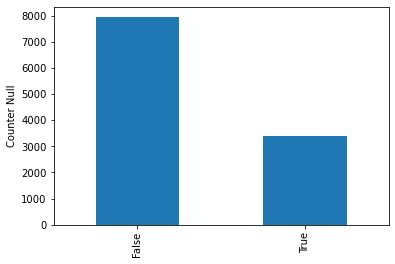

In [26]:
df_tweet['location'].isnull().value_counts().plot(kind='bar', ylabel='Counter Null')

In [27]:
df_tweet['word_count'] = df_tweet['text'].apply(lambda x: len(str(x).split()))

In [28]:
df_tweet

,keyword,location,text,target,word_count
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,19
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,23
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,7
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,8
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,23
...,...,...,...,...,...
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,17
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,22
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,23
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,17


## For Unique Value Use Set {}

In [29]:
df_tweet['unique_word_count'] = df_tweet['text'].apply(lambda x: len(set(str(x).split())))

In [30]:
df_tweet

,keyword,location,text,target,word_count,unique_word_count
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,19,16
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,23,22
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,7,7
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,8,8
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,23,19
...,...,...,...,...,...,...
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,17,17
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,22,20
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,23,21
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,17,17


In [39]:
stop_word = stopwords.words('english')

In [40]:
df_tweet['stop_word_count'] = df_tweet['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_word]))

In [41]:
df_tweet

,keyword,location,text,target,word_count,unique_word_count,stop_word_count
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,19,16,7
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,23,22,8
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,7,7,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,8,8,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,23,19,9
...,...,...,...,...,...,...,...
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,17,17,7
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,22,20,8
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,23,21,8
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,17,17,4


In [43]:
df_tweet['punctuation_count'] = df_tweet['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [61]:
df_tweet['target'].value_counts()

0    9256
1    2114
Name: target, dtype: int64

<AxesSubplot:ylabel='Disaster-Tweet'>

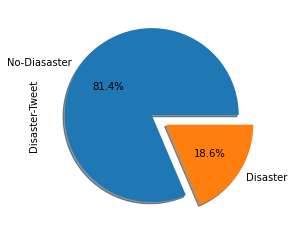

In [64]:
df_tweet['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0, 0.2), labels=('No-Diasaster', 'Disaster'), label='Disaster-Tweet')

In [66]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop_word]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [69]:
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

In [71]:
Disaster_Tweet = df_tweet['target'] == 1

In [73]:
for tweet in df_tweet[Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_tweet[~Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

In [76]:
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_tweet[Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_tweet[~Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

In [78]:
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_tweet[Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_tweet[~Disaster_Tweet]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

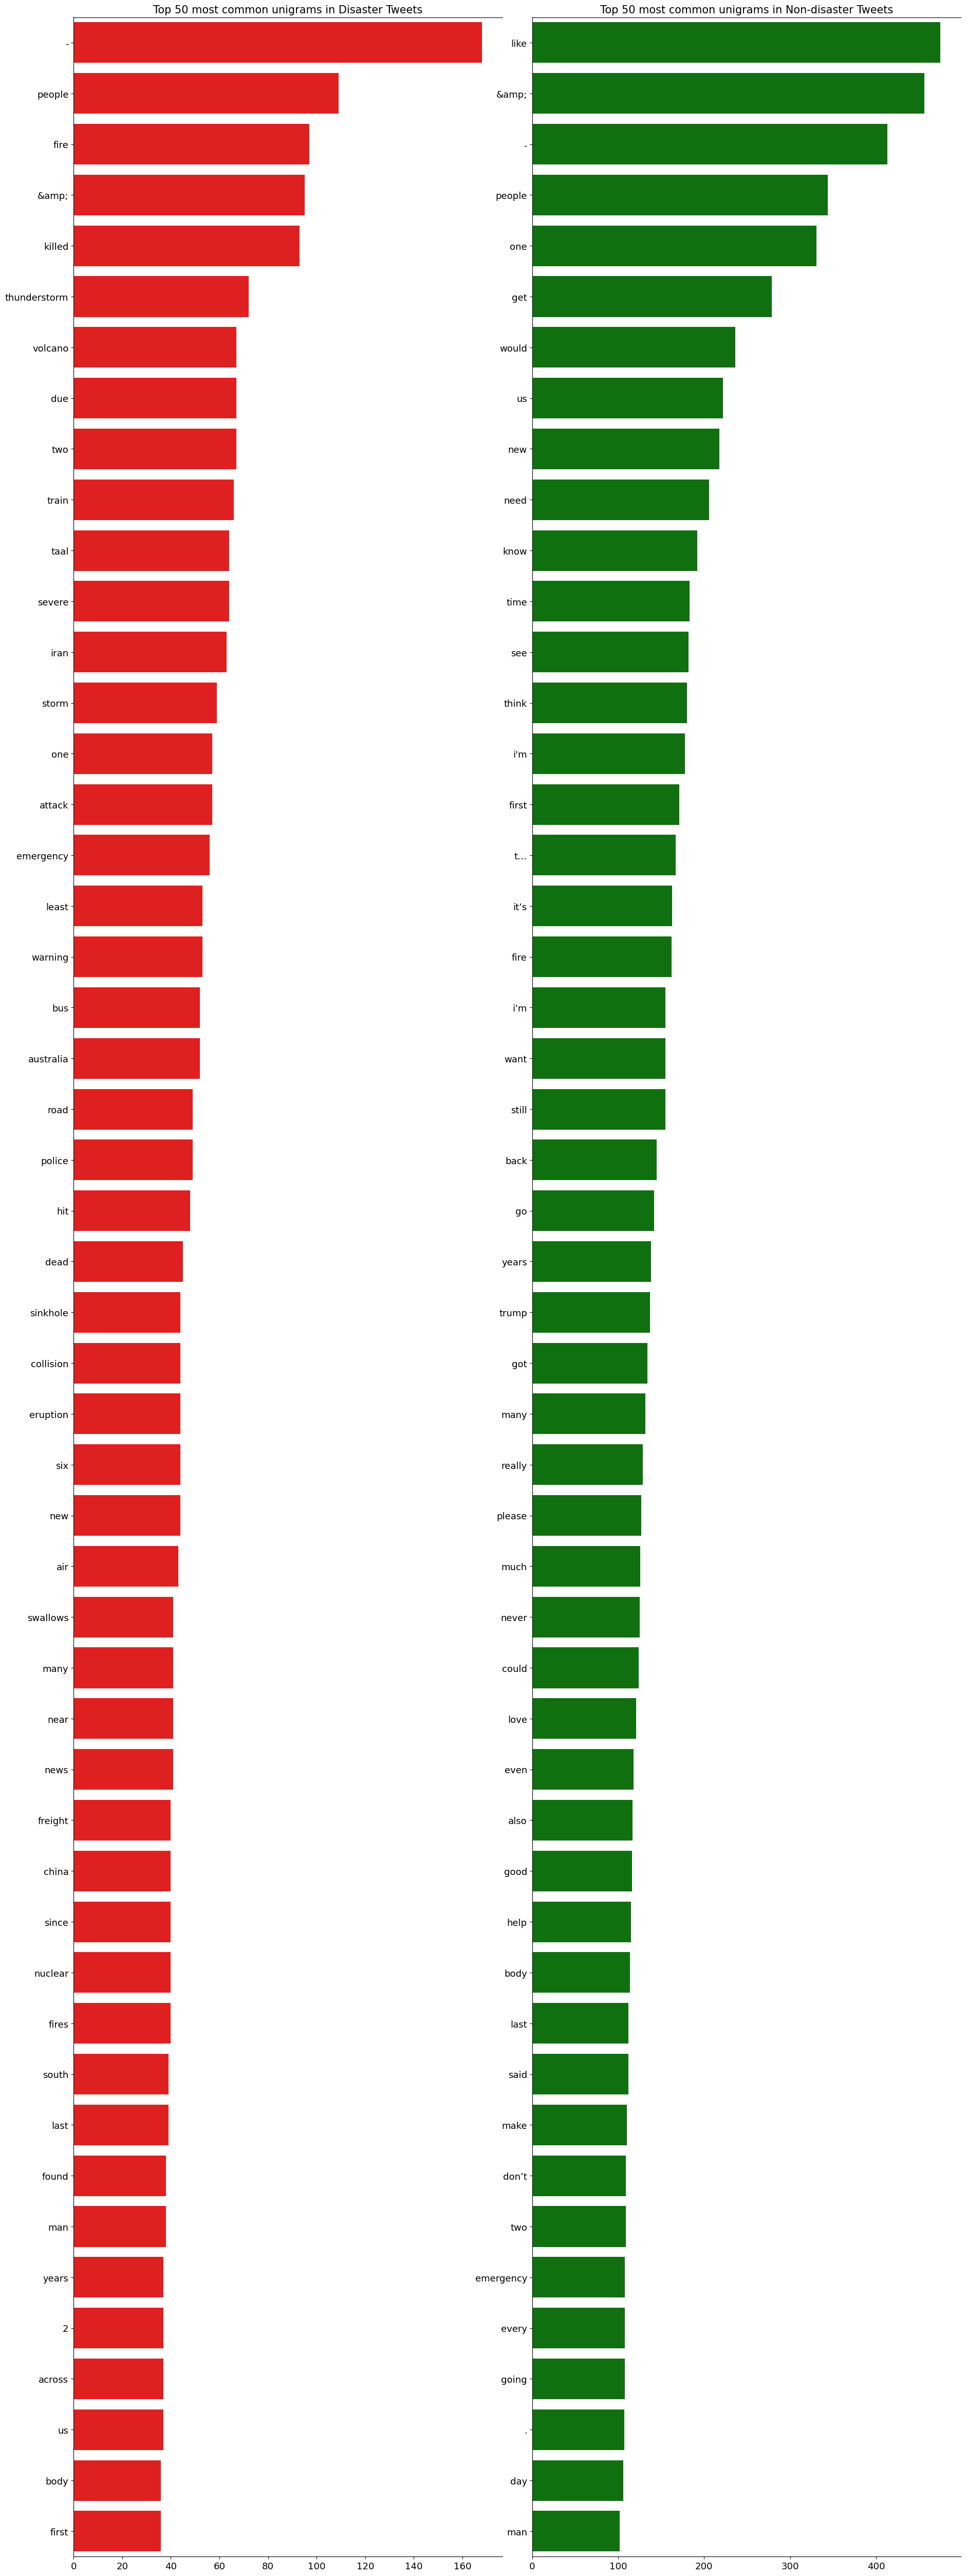

In [86]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:50], x=df_disaster_unigrams[1].values[:50], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:50], x=df_nondisaster_unigrams[1].values[:50], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {50} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {50} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()

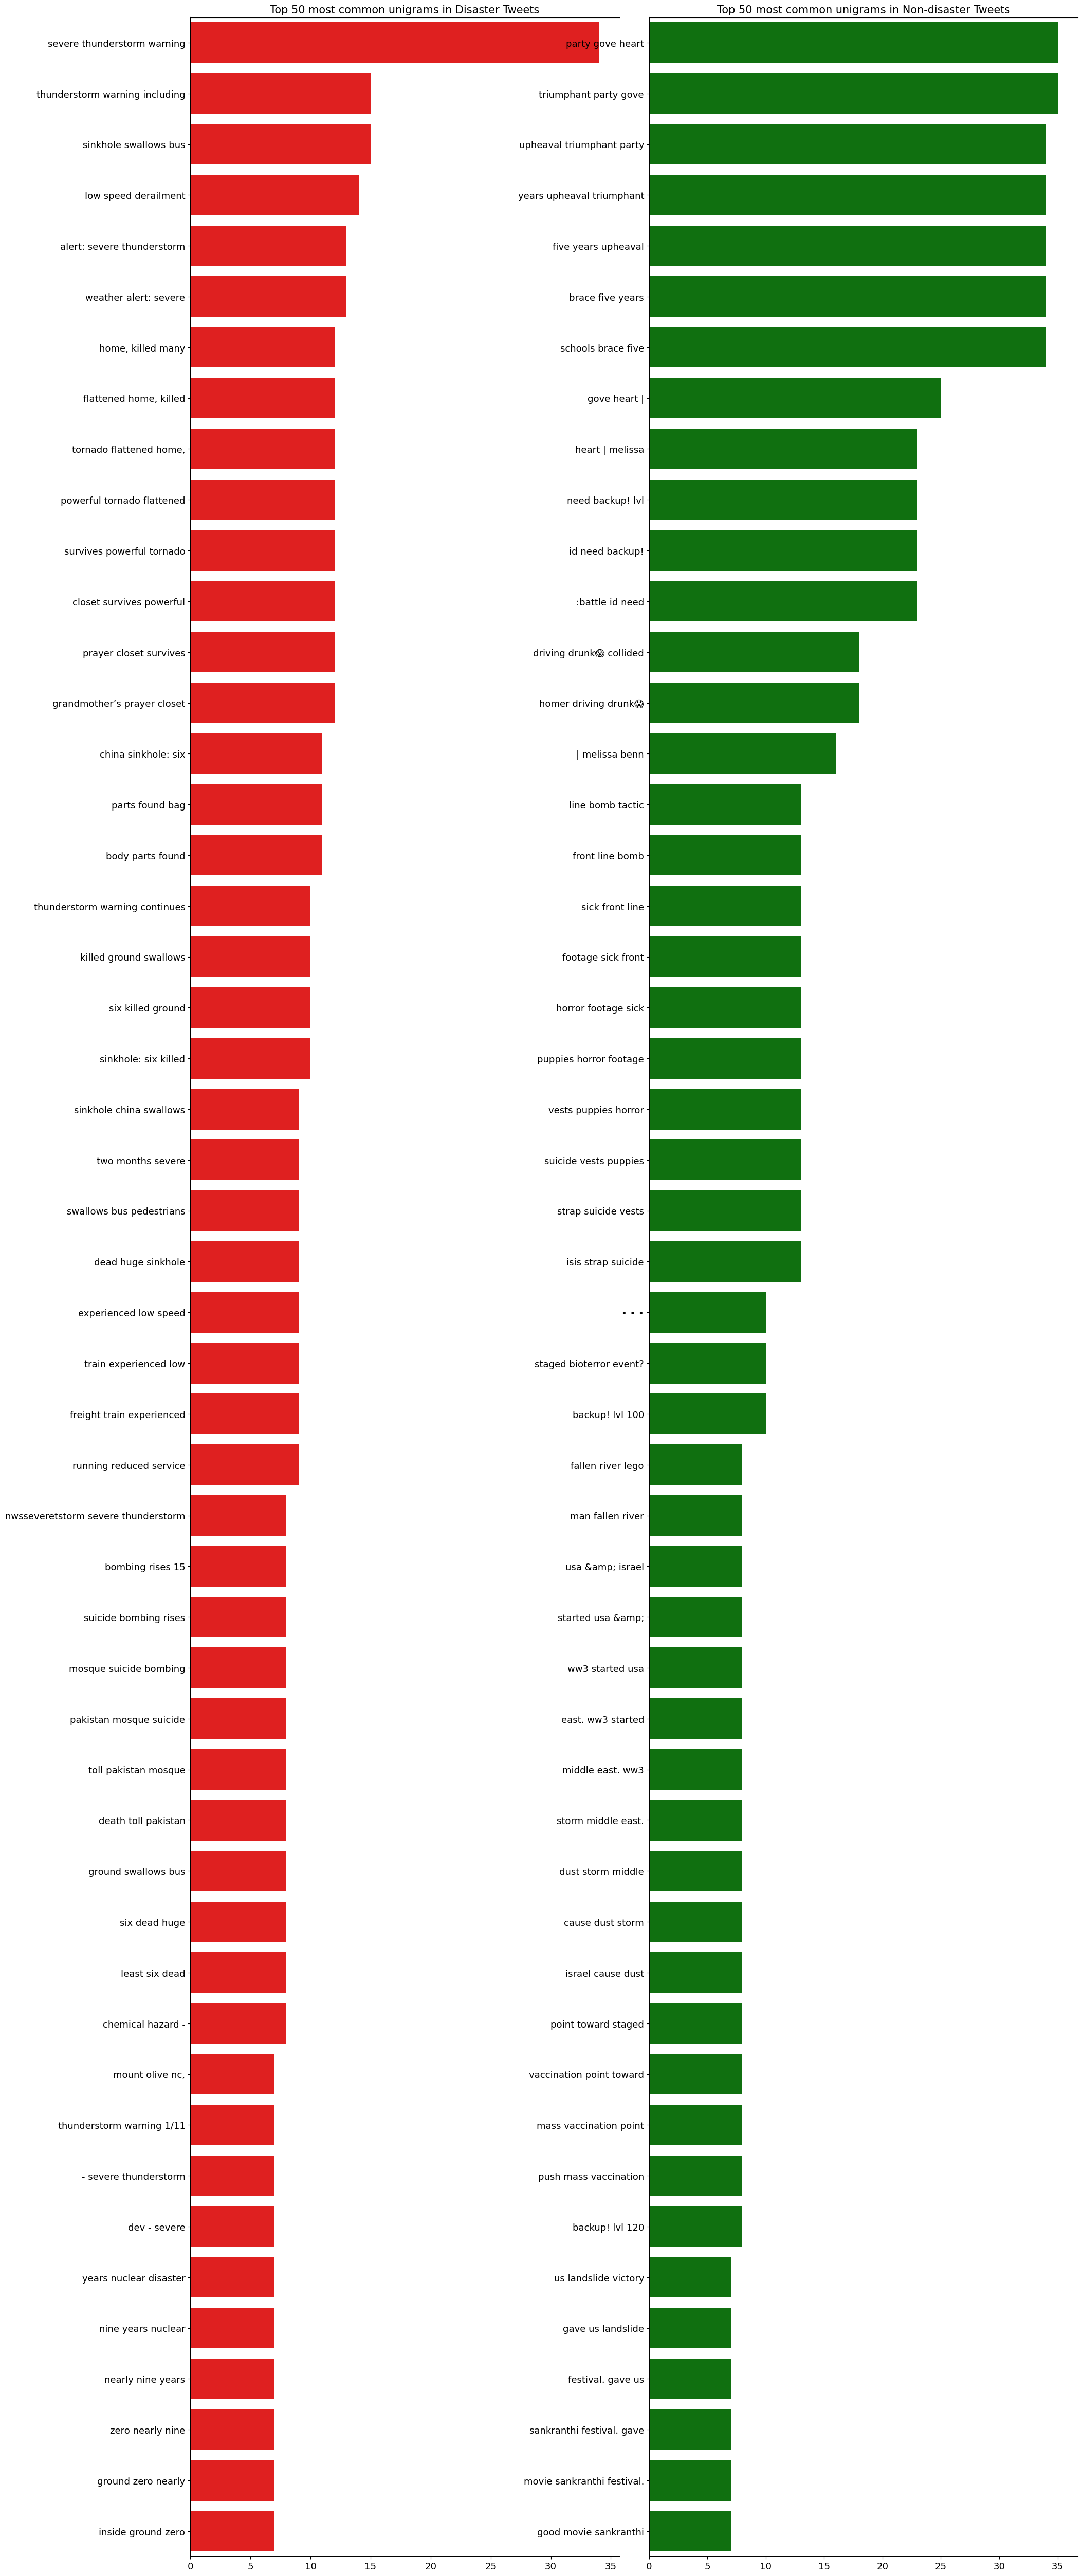

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_trigrams[0].values[:50], x=df_disaster_trigrams[1].values[:50], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:50], x=df_nondisaster_trigrams[1].values[:50], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {50} most common unigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {50} most common unigrams in Non-disaster Tweets', fontsize=15)

plt.show()